In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\micky\Desktop\碩士\109-2\MahcineLearning\Course7-Dimensinality Reduction\ANSUR_II_FEMALE.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          1986 non-null   object 
 1   Component                       1986 non-null   object 
 2   Gender                          1986 non-null   object 
 3   abdominalextensiondepthsitting  1986 non-null   int64  
 4   acromialheight                  1986 non-null   int64  
 5   acromionradialelength           1986 non-null   int64  
 6   anklecircumference              1986 non-null   int64  
 7   axillaheight                    1986 non-null   int64  
 8   balloffootcircumference         1986 non-null   int64  
 9   balloffootlength                1986 non-null   int64  
 10  biacromialbreadth               1986 non-null   int64  
 11  bicepscircumferenceflexed       1986 non-null   int64  
 12  bicristalbreadth                19

headbreadth           26.955626
headcircumference    374.846085
headlength            55.489907
dtype: float64


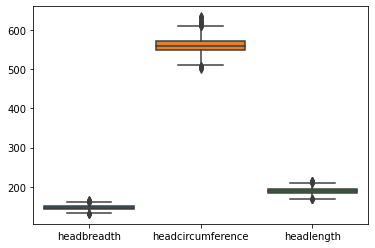

In [11]:
import numpy as np
import seaborn as sns
head = df[['headbreadth','headcircumference','headlength']]
sns.boxplot(data = head)
print(head.var())

headbreadth          0.001234
headcircumference    0.001191
headlength           0.001540
dtype: float64


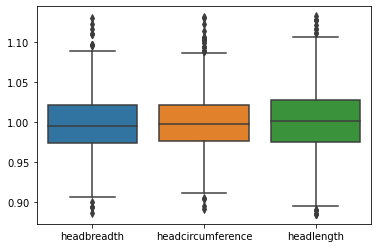

In [10]:
nor_head = head/head.mean()
sns.boxplot(data = nor_head)
print(nor_head.var())

In [14]:
#透過設定變異數門檻來選擇特徵
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.0013)

# Fit the selector to normalized head_df
sel.fit(nor_head)

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 3 to 1.


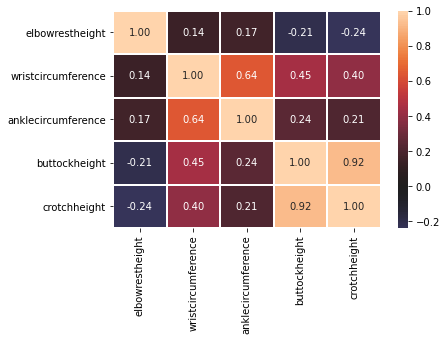

In [16]:
#透過相關係數矩陣來找出關聯度高的特徵
df_cor = df[['elbowrestheight','wristcircumference','anklecircumference','buttockheight','crotchheight']]
# Create the correlation matrix
corr = df_cor.corr()

# Draw the heatmap
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")

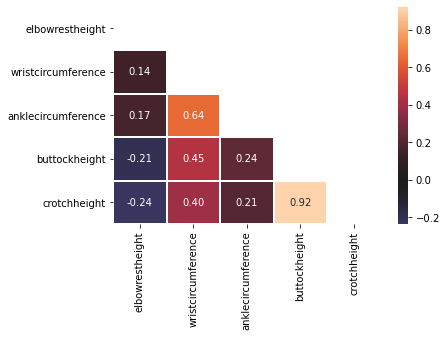

In [18]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")